In [492]:
############################################################################################################################
#                                                  Torben Falleth Olsen
#                                           Rapidly exploring Random Trees (RRT)
############################################################################################################################

import numpy as np
from numpy.linalg import inv
from numpy.linalg import norm
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [20,20]

#####################################
#           Parameters
#####################################

Delta_q = 50                                           # Step size

vehicle_rad = 1.0                                      # [m] - Radius of possible vehicle

###### Region #####
x_span_min = 0.0 
x_span_max = 1000.0

y_span_min = 0.0
y_span_max = 1000.0

###### Goal #######
goal_bias = 0.1                                        # [%] - Probability factor of hitting goal
goal = [780.0,500.0]                                   # [x,y] - Goal position

###### Position ######
#Position = [250.0,100.0]

###### Obstacle ######
obstacle = [[650.0,500.0],[300.0,200.0]]               # [x,y] - Obstacle position
obs_rad = [125.0,125.0]                                # [m] - Obstacle radius







In [493]:
#####################################
#        Sample Random Point
#####################################
def random_sample():
    ran_vec = []
    q_rand = []
    n = np.random.rand(1,1)                                                                # Random probability number.
    if (n < goal_bias):                                                                    # if within goal probability
        ran_vec.append(goal[0])                                                            # Set random point = goal
        ran_vec.append(goal[1])
    
    else:                                                                                  # If not
        rand = np.random.rand(1,2)                                                         # Sample random point
        for i in range(0,2):
            ran_vec.append((goal[i]/abs(goal[i]))*(span[i][1] - span[i][0])*rand[0][i])    # Create random point within
                                                                                           # span
    rand_p.append([ran_vec[0],ran_vec[1]])
    q_rand.append(ran_vec[0])
    q_rand.append(ran_vec[1])
    
    # Return random point
    return q_rand


In [494]:
#####################################
#      Calculate The Nearest Node
#####################################
def Calc_nearest_node(rand,tree):
    nearest = np.inf
    q_near = []
    for ind in range(0,len(tree)):                        # loop throug the entire tree.
        x = rand[0]-tree[ind][0]
        y = rand[1]-tree[ind][1]
        vec = [x,y]
        dist = norm(vec)                                  # Calculate distance between random node and every node in tree.
        
        if dist < nearest:                                # Find the closest node.
            q_near = tree[ind]
            index = ind
            nearest = dist
            
    # Return closest node, the distance and the index
    return q_near,nearest,index


In [495]:
#####################################
#        Calculate The New Node
#####################################
def Calc_new_node(q_n,q_r,near):
    q_new = []
    x = q_r[0] - q_n[0]
    y = q_r[1] - q_n[1]
    x1 = x*(Delta_q/near)
    y1 = y*(Delta_q/near)
    vec0 = [x1,y1]
    vec = [x,y]
    
    
    if Delta_q <= near:                                       # If the distance to random sample is grater than delta q.
        q_new = [q_n[0] + vec0[0],q_n[1] + vec0[1]]           # Create node with distance = step size.
    else:
        q_new = [q_n[0] + vec[0],q_n[1] + vec[1]]             # If distance is less, add distance.
        
    # Return the new node
    return q_new


In [496]:
#####################################
#        Collision Avoidance
#####################################

def Collision(point1,point2,ob,ob_rad,v_rad):
    
    collision = False

    for i in range(0,len(ob)):
        
        AB = np.subtract(point2,point1)        # Calculate line segment length
        
        
        BP = np.subtract(ob[i],point2)         # Calculate distance between current node and obstacle
        
        
        AP = np.subtract(ob[i],point1)         # Calculate distance between parent node and obstacle
        
        # Case 1 - The given point lies in the same direction as the vector AB is and the nearest point must be B.
        if (np.dot(AB,BP) > 0):
            
            distance_obs = norm(BP)
            
        # Case 2 - The given point lies in the opposite direction of the line segment AB and the nearest point must be A. 
        elif (np.dot(AB,AP) < 0):
            
            distance_obs = norm(AP)
        
        # Case 3 - E is perpendicular to the line segment AB.
        else:
            distance_obs = norm(np.cross(AB,AP)) / norm(AB)
            
                                
        if ((ob_rad[i]+v_rad) > distance_obs):      # If the branch is colliding with the obstacle 
            
            collision = True                        # Set collition = true
            break
        else:
                                
            collision = False
            
    # Return collision bool
    return collision


In [498]:
#####################################
#              Main
#####################################

def main(Position):

#-------------------------------------------------------- RRT ----------------------------------------------------------    
    
    #####################################
    #        Initialize Tree
    #####################################
    root_parent = -1
    RRT_tree = [Position]
    Path = [goal]
    Parent = [root_parent]
    rand_p = []
    q_new = []
    span = [[x_span_min,x_span_max], [y_span_min,y_span_max]]
    
    for k in range(1, 500):
        q_rand = random_sample()
        q_near,near,parent_index = Calc_nearest_node(q_rand,RRT_tree)
        q_new = Calc_new_node(q_near,q_rand,near)
        collision = Collision(q_near,q_new,obstacle,obs_rad,vehicle_rad)
        
    #####################################
    #      Connect New Node To Tree
    #####################################
        if (collision == False):
            
            RRT_tree.append(q_new)
            Parent.append(parent_index)
           
        if q_new == goal:
            break

#----------------------------------------------------- Create Path -----------------------------------------------------
    index = Parent[len(Parent)-1];

    while (Parent[index]>=0):
        ParentNode = RRT_tree[index]
        Path.append(ParentNode)
        index = Parent[index]
    ParentNode = RRT_tree[index]
    Path.append(ParentNode)
    

#------------------------------------------------------- Plot ----------------------------------------------------------
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, 2001, 100)
    minor_ticks = np.arange(0, 2001, 10)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    ax.grid(which='both')

    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

    ######### Set Plot Limit ###########
    plt.xlim([x_span_min, x_span_max])
    plt.ylim([y_span_min, y_span_max])

    ######### Plot Goal ###########
    plt.plot(goal[0], goal[1],marker="o", markersize=15,markeredgecolor="green",markerfacecolor="green",label="Goal")

    ######### Plot Position ###########
    plt.plot(Position[0], Position[1],marker="o", markersize=15,markeredgecolor="red",markerfacecolor="red",label="Position")

    ######### Plot Random Samples ###########
    for i in range(0,len(rand_p)):
        plt.plot(rand_p[i][0],rand_p[i][1],marker="o", markersize=5,markeredgecolor="lightblue",markerfacecolor="lightblue")
    
    ######### Plot Tree ###########
    plt.plot(RRT_tree[0][0],RRT_tree[0][1],marker="o", markersize=7,markeredgecolor="blue",markerfacecolor="blue",label="Tree Node")
    for i in range(1,len(RRT_tree)):
        plt.plot([RRT_tree[i][0],RRT_tree[Parent[i]][0]],[RRT_tree[i][1],RRT_tree[Parent[i]][1]],'bo', linestyle="--")

    ######### Plot Path ###########
    plt.plot([Path[0][0],Path[0+1][0]],[Path[0][1],Path[0+1][1]],'ro',linewidth=2.0,linestyle="-",label="Path")
    for i in range(0,len(Path)-1):
        plt.plot([Path[i][0],Path[i+1][0]],[Path[i][1],Path[i+1][1]],'ro',linewidth=2.0,linestyle="-")

    ######### Plot Obstacle ###########
    for i in range(0,len(obstacle)):
        plt.plot(obstacle[i][0],obstacle[i][1],marker="o", markersize=2*obs_rad[i],markeredgecolor="orange",markerfacecolor="orange")

    plt.legend()
    plt.show()

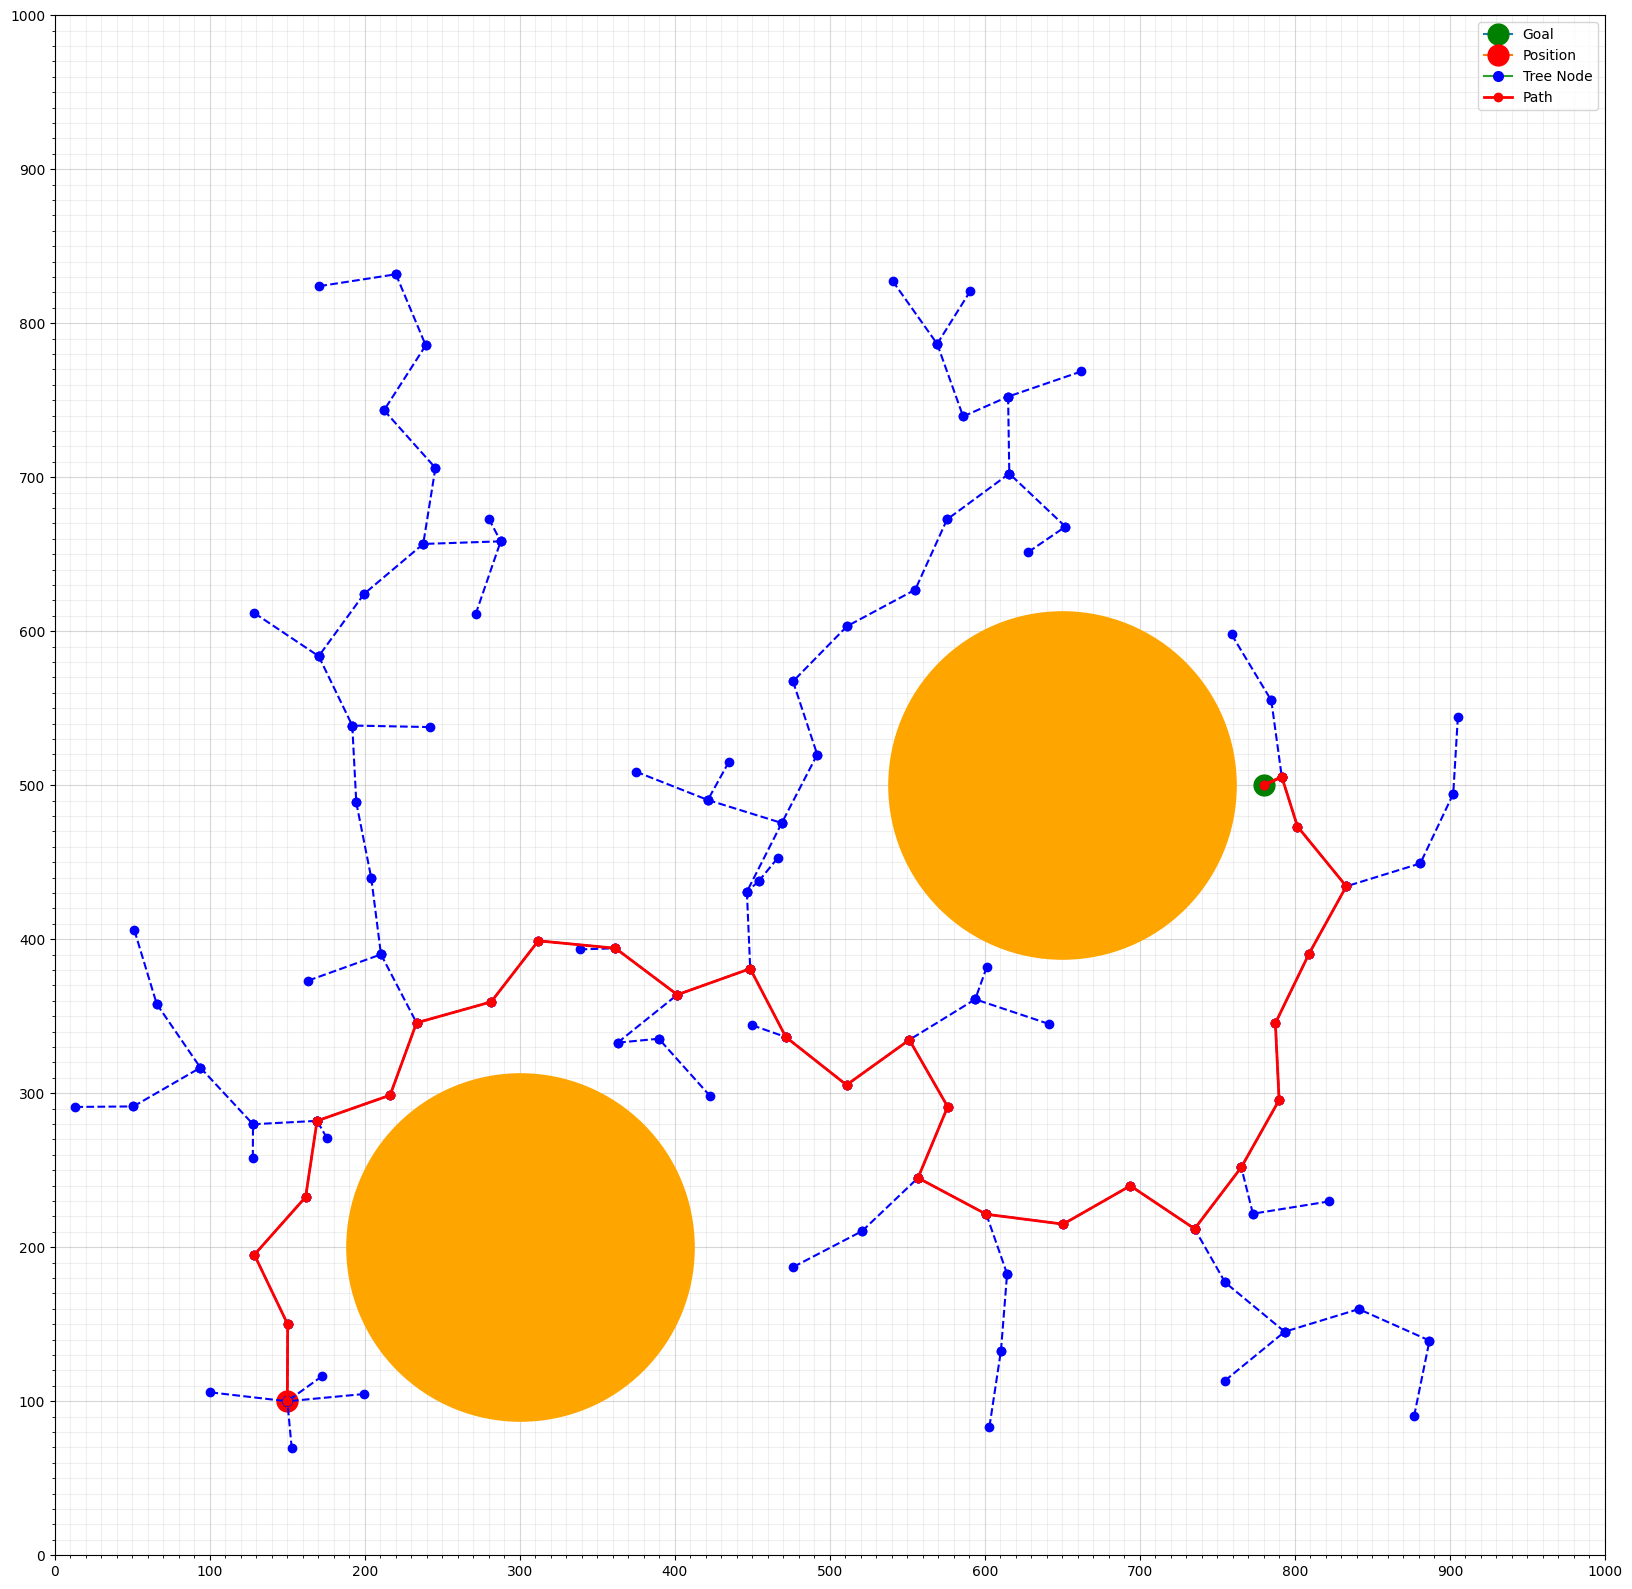

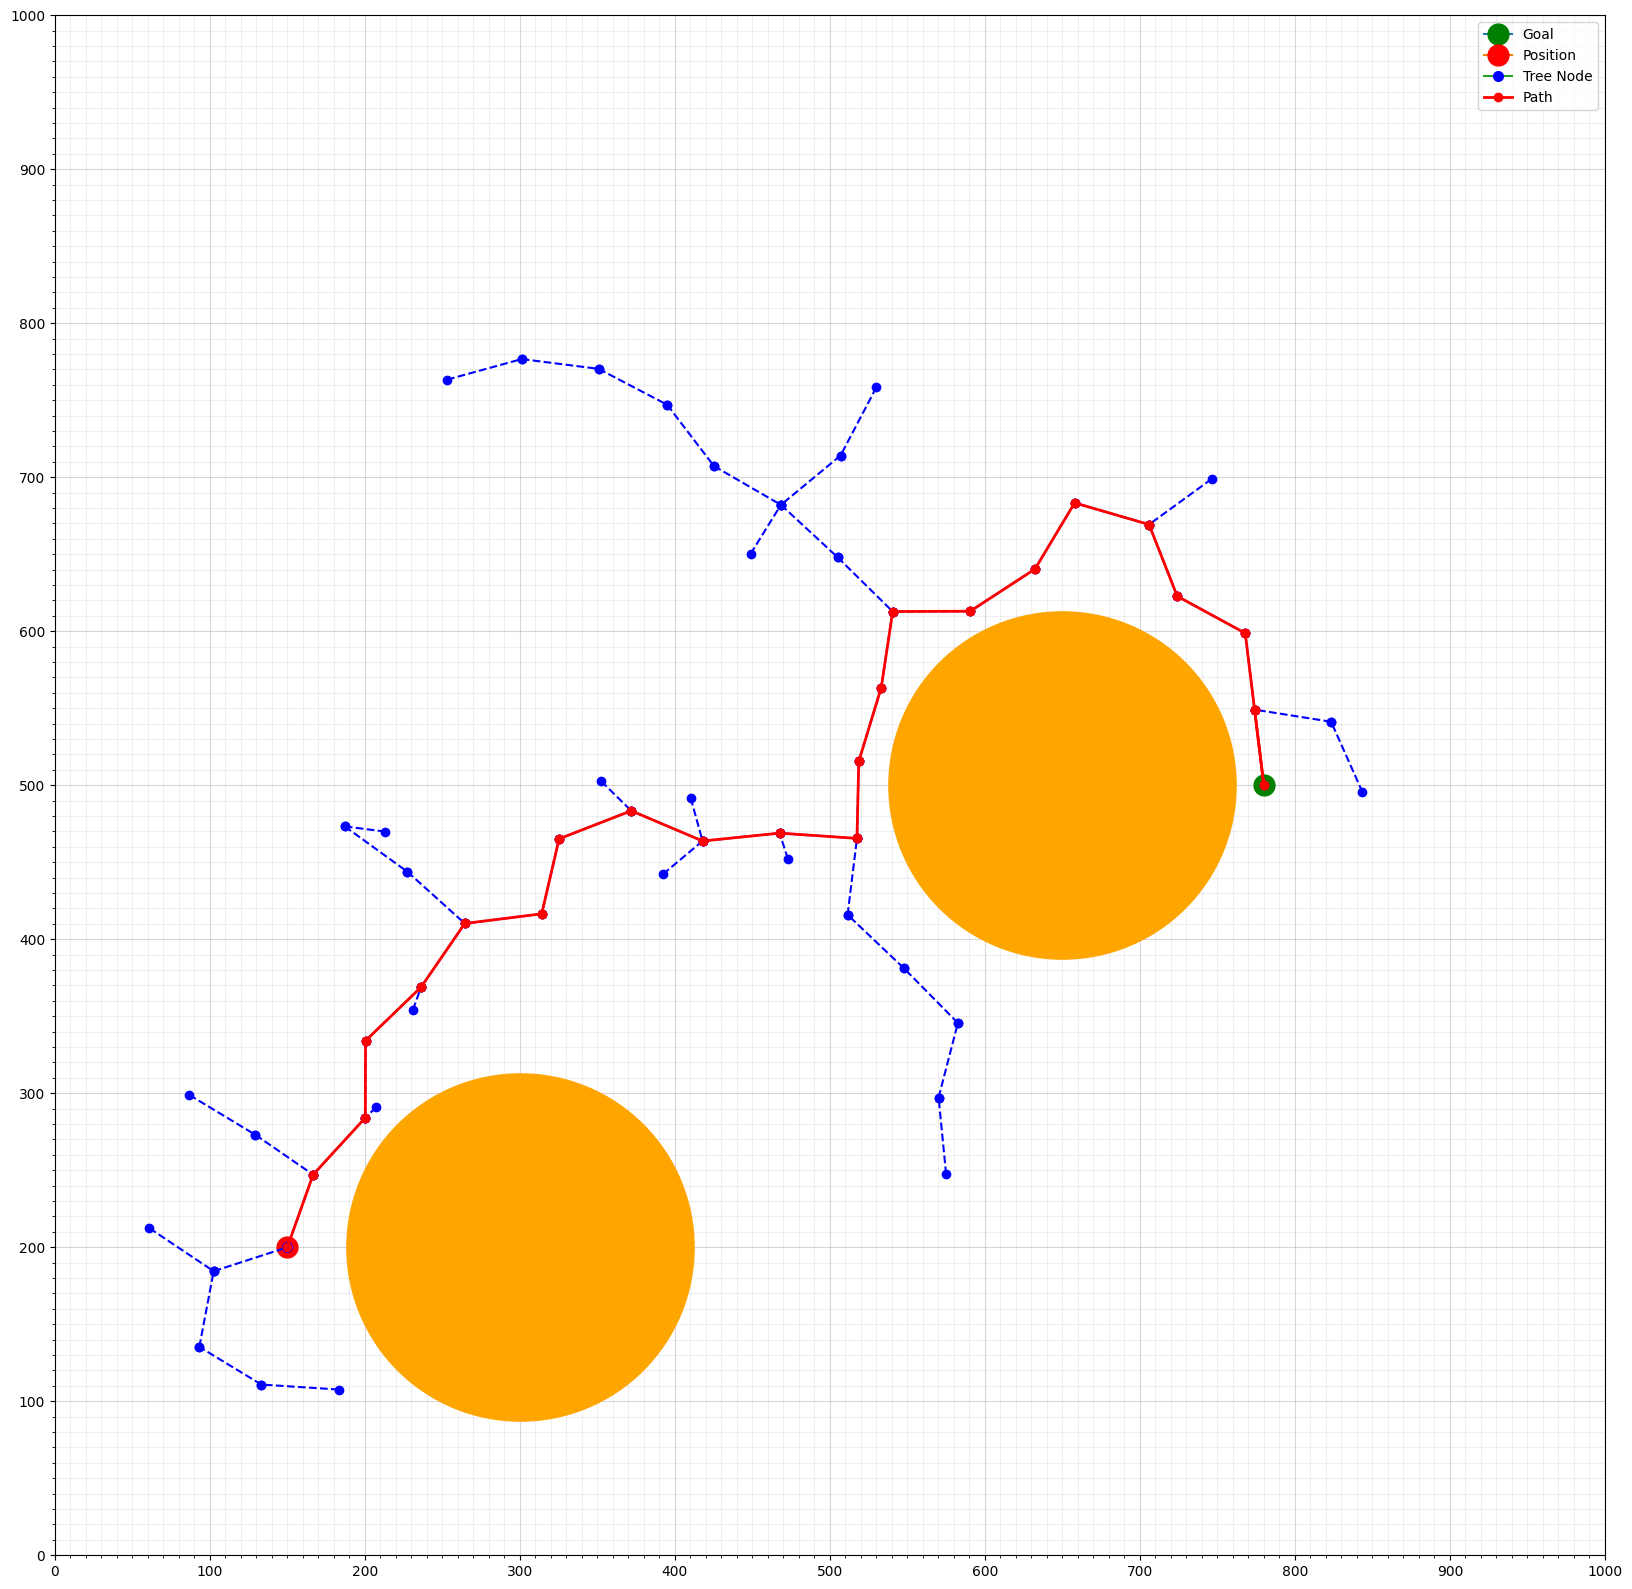

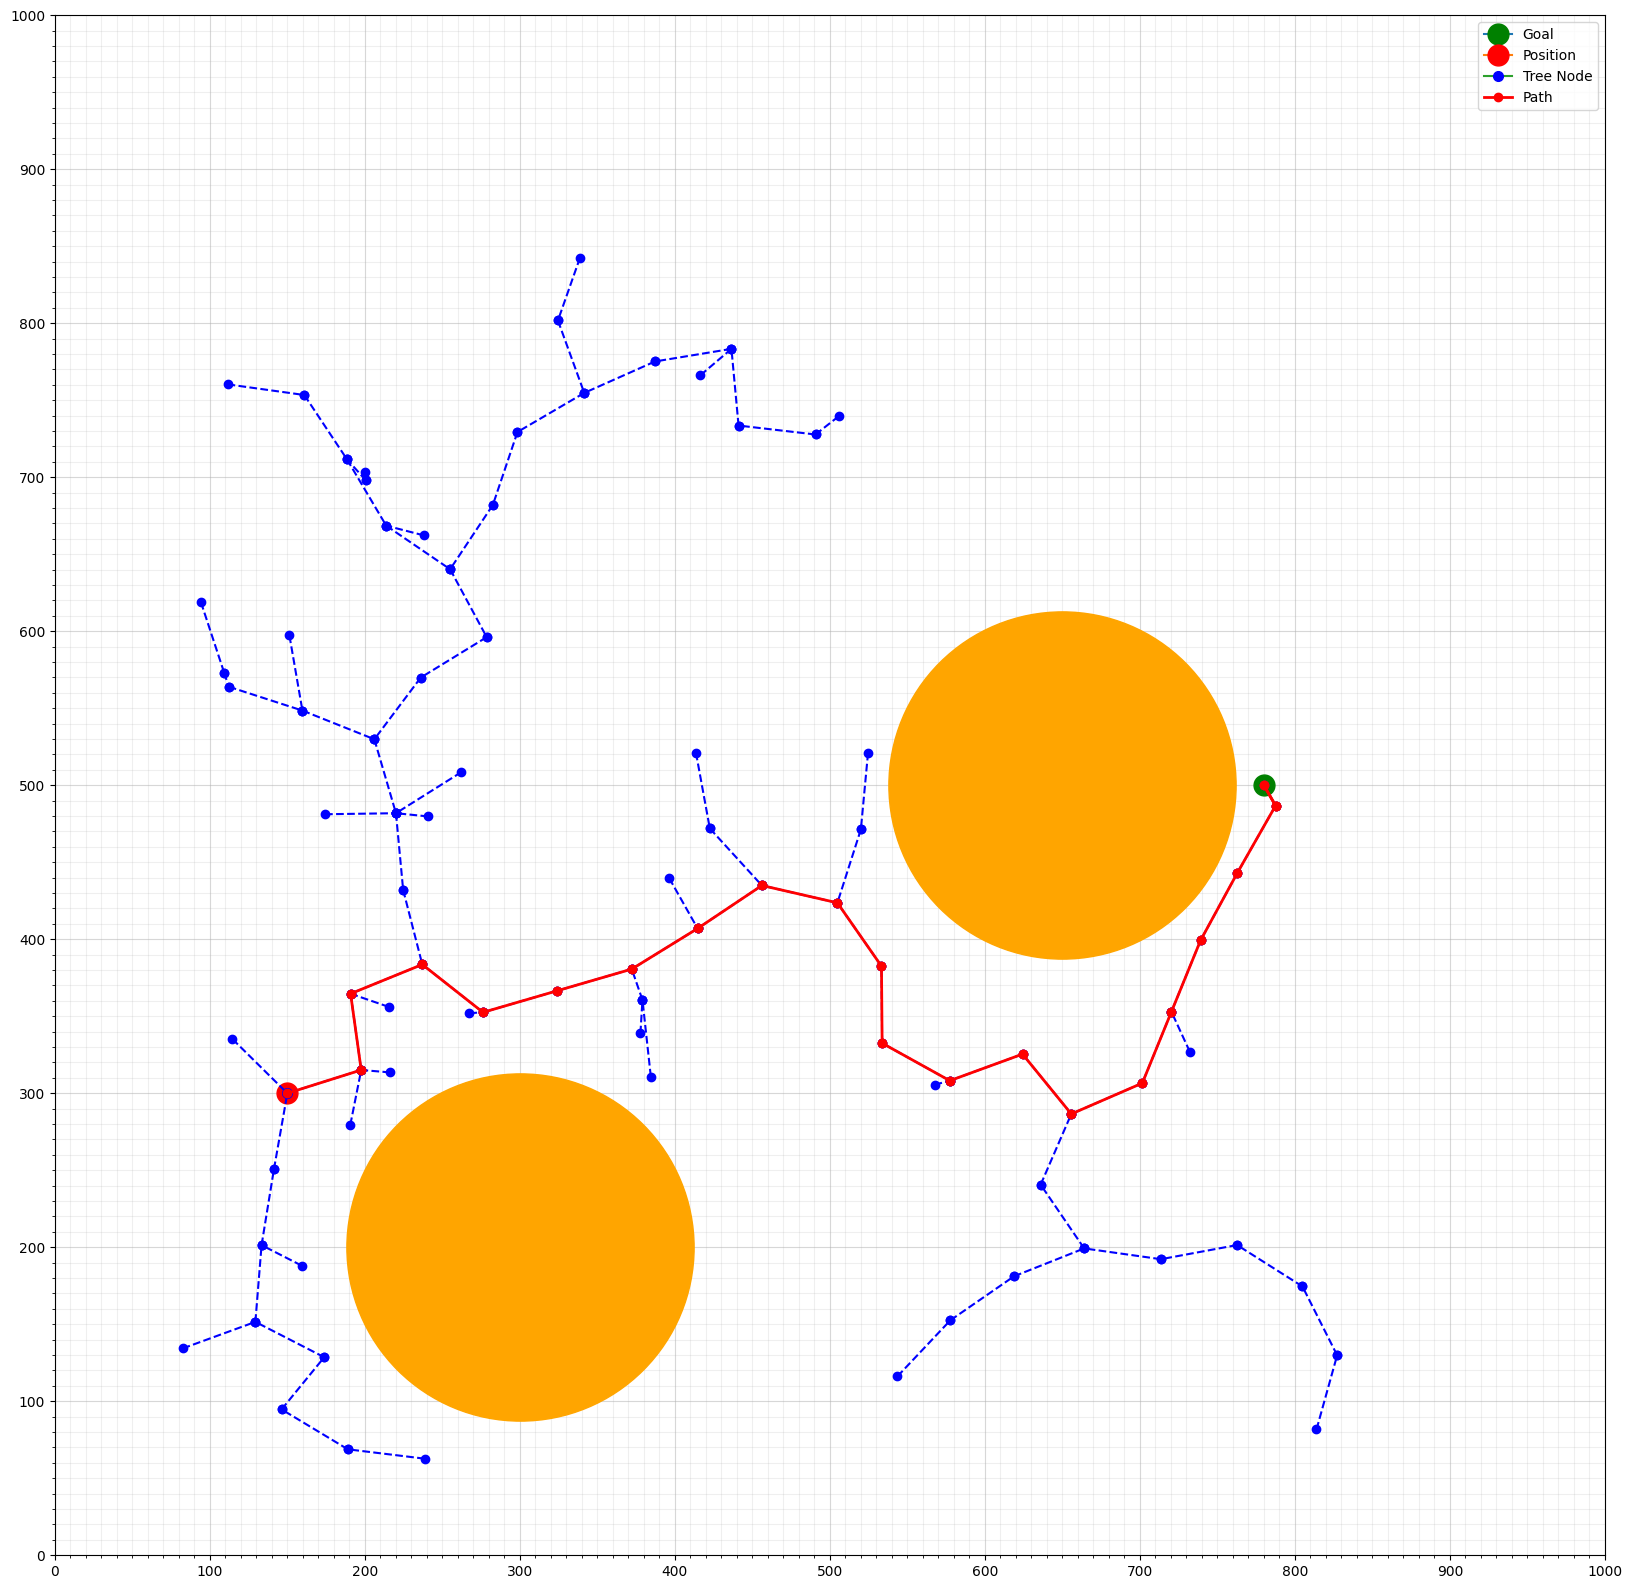

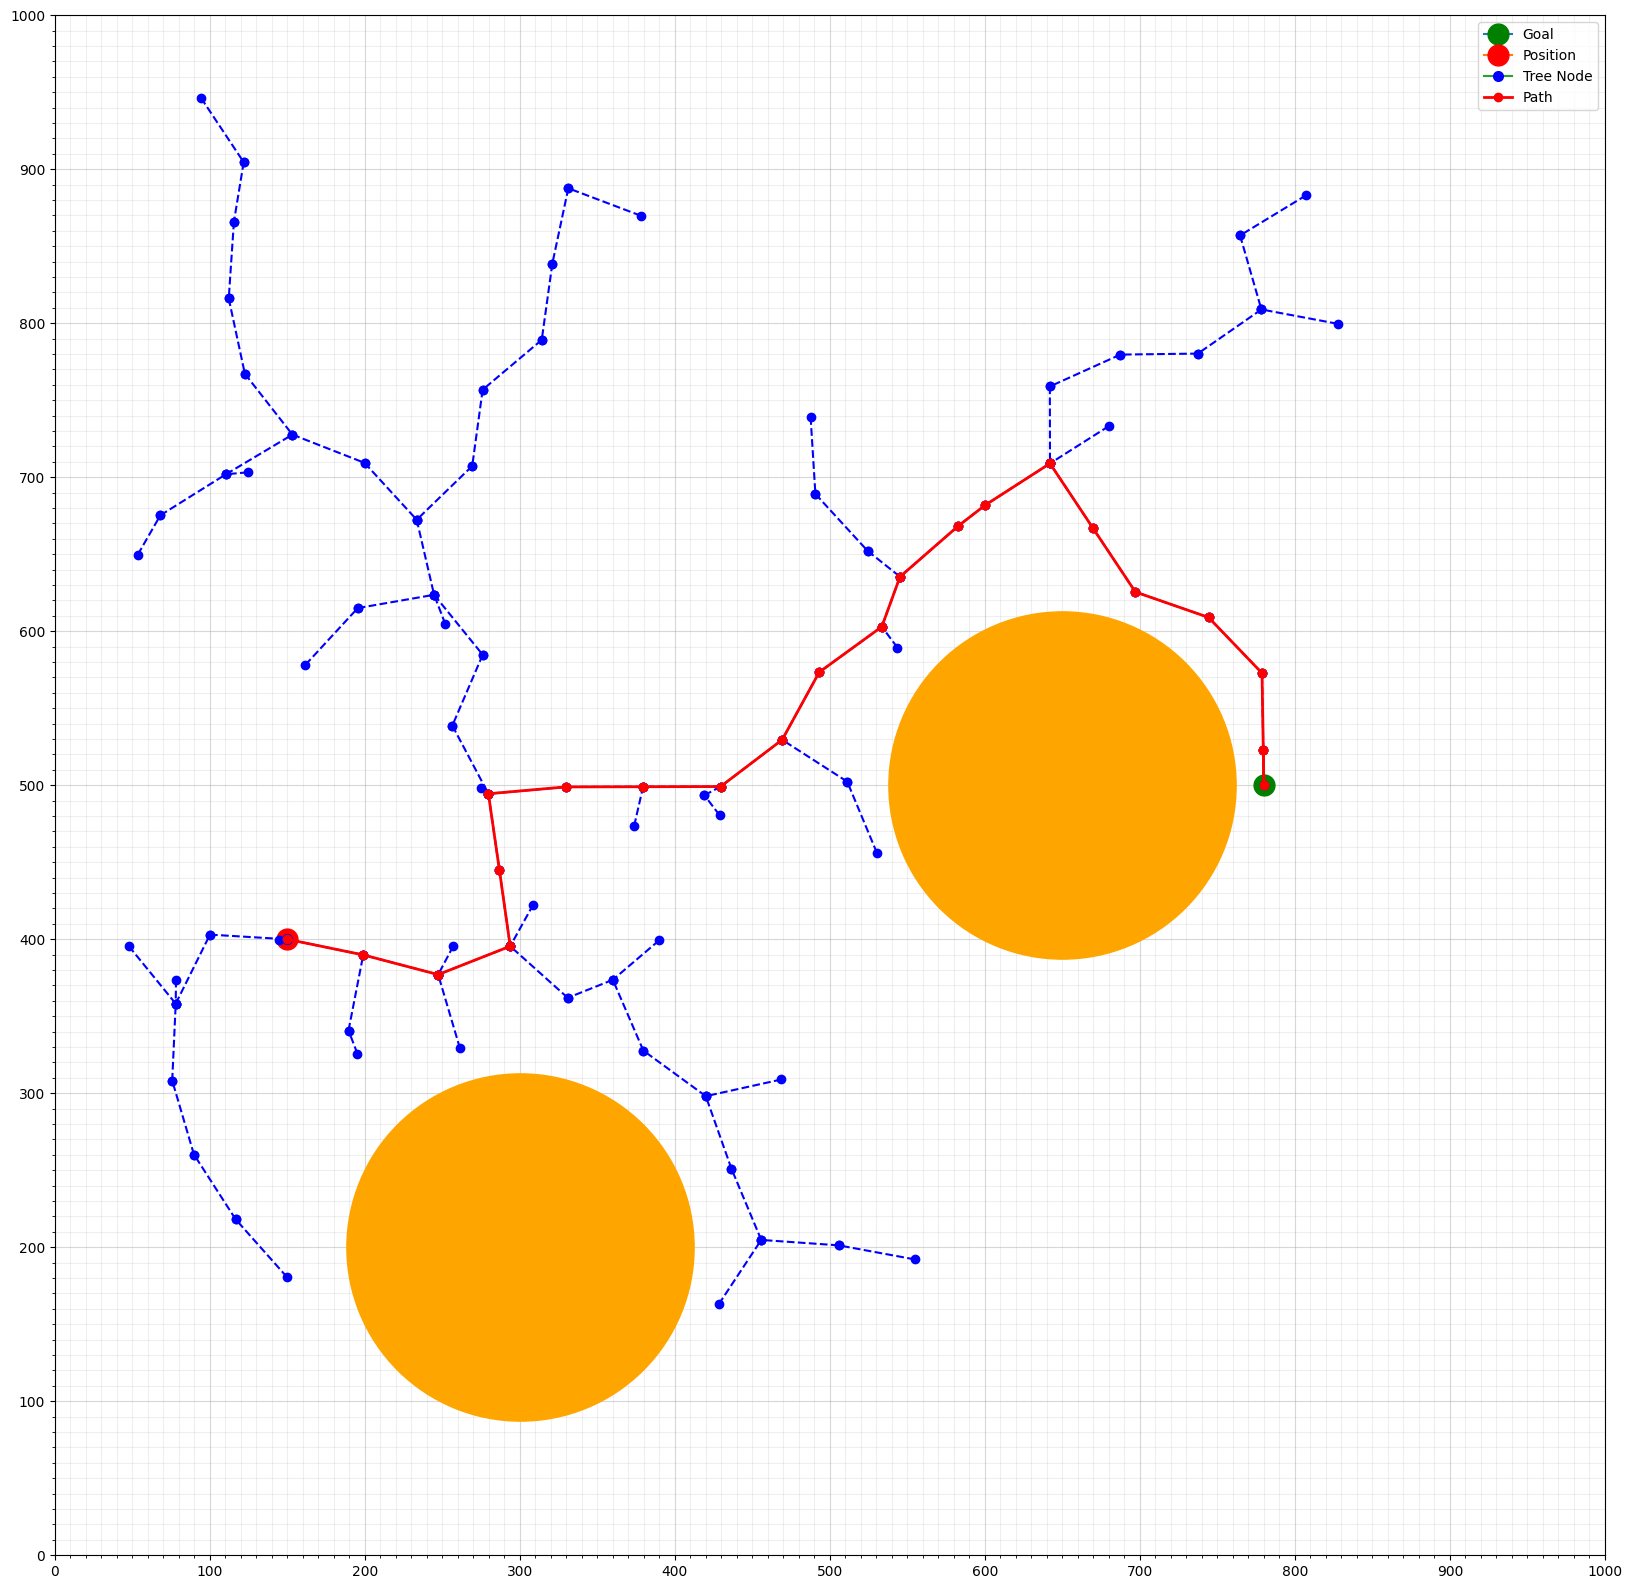

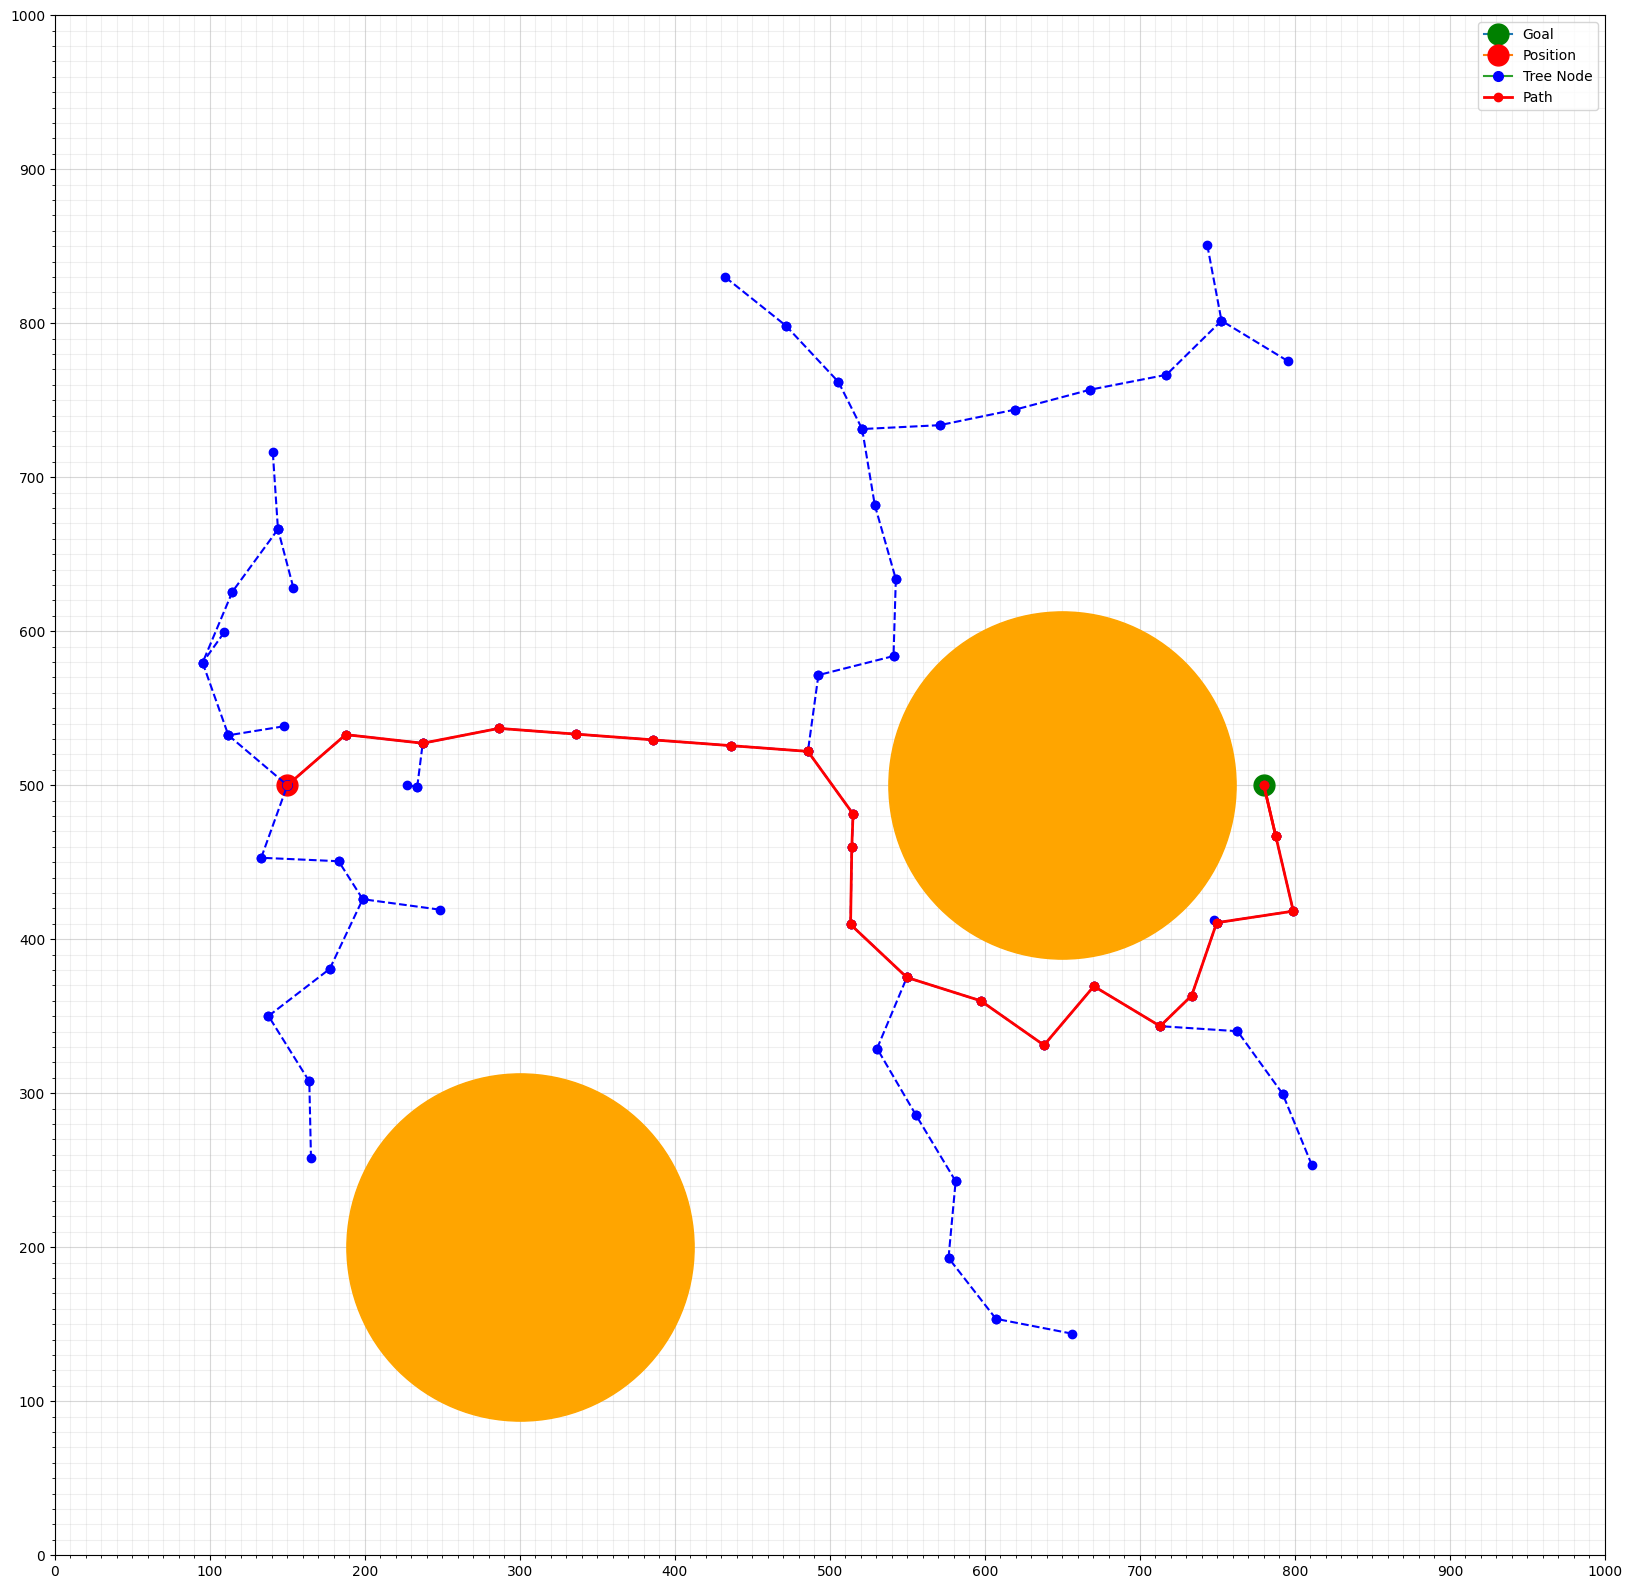

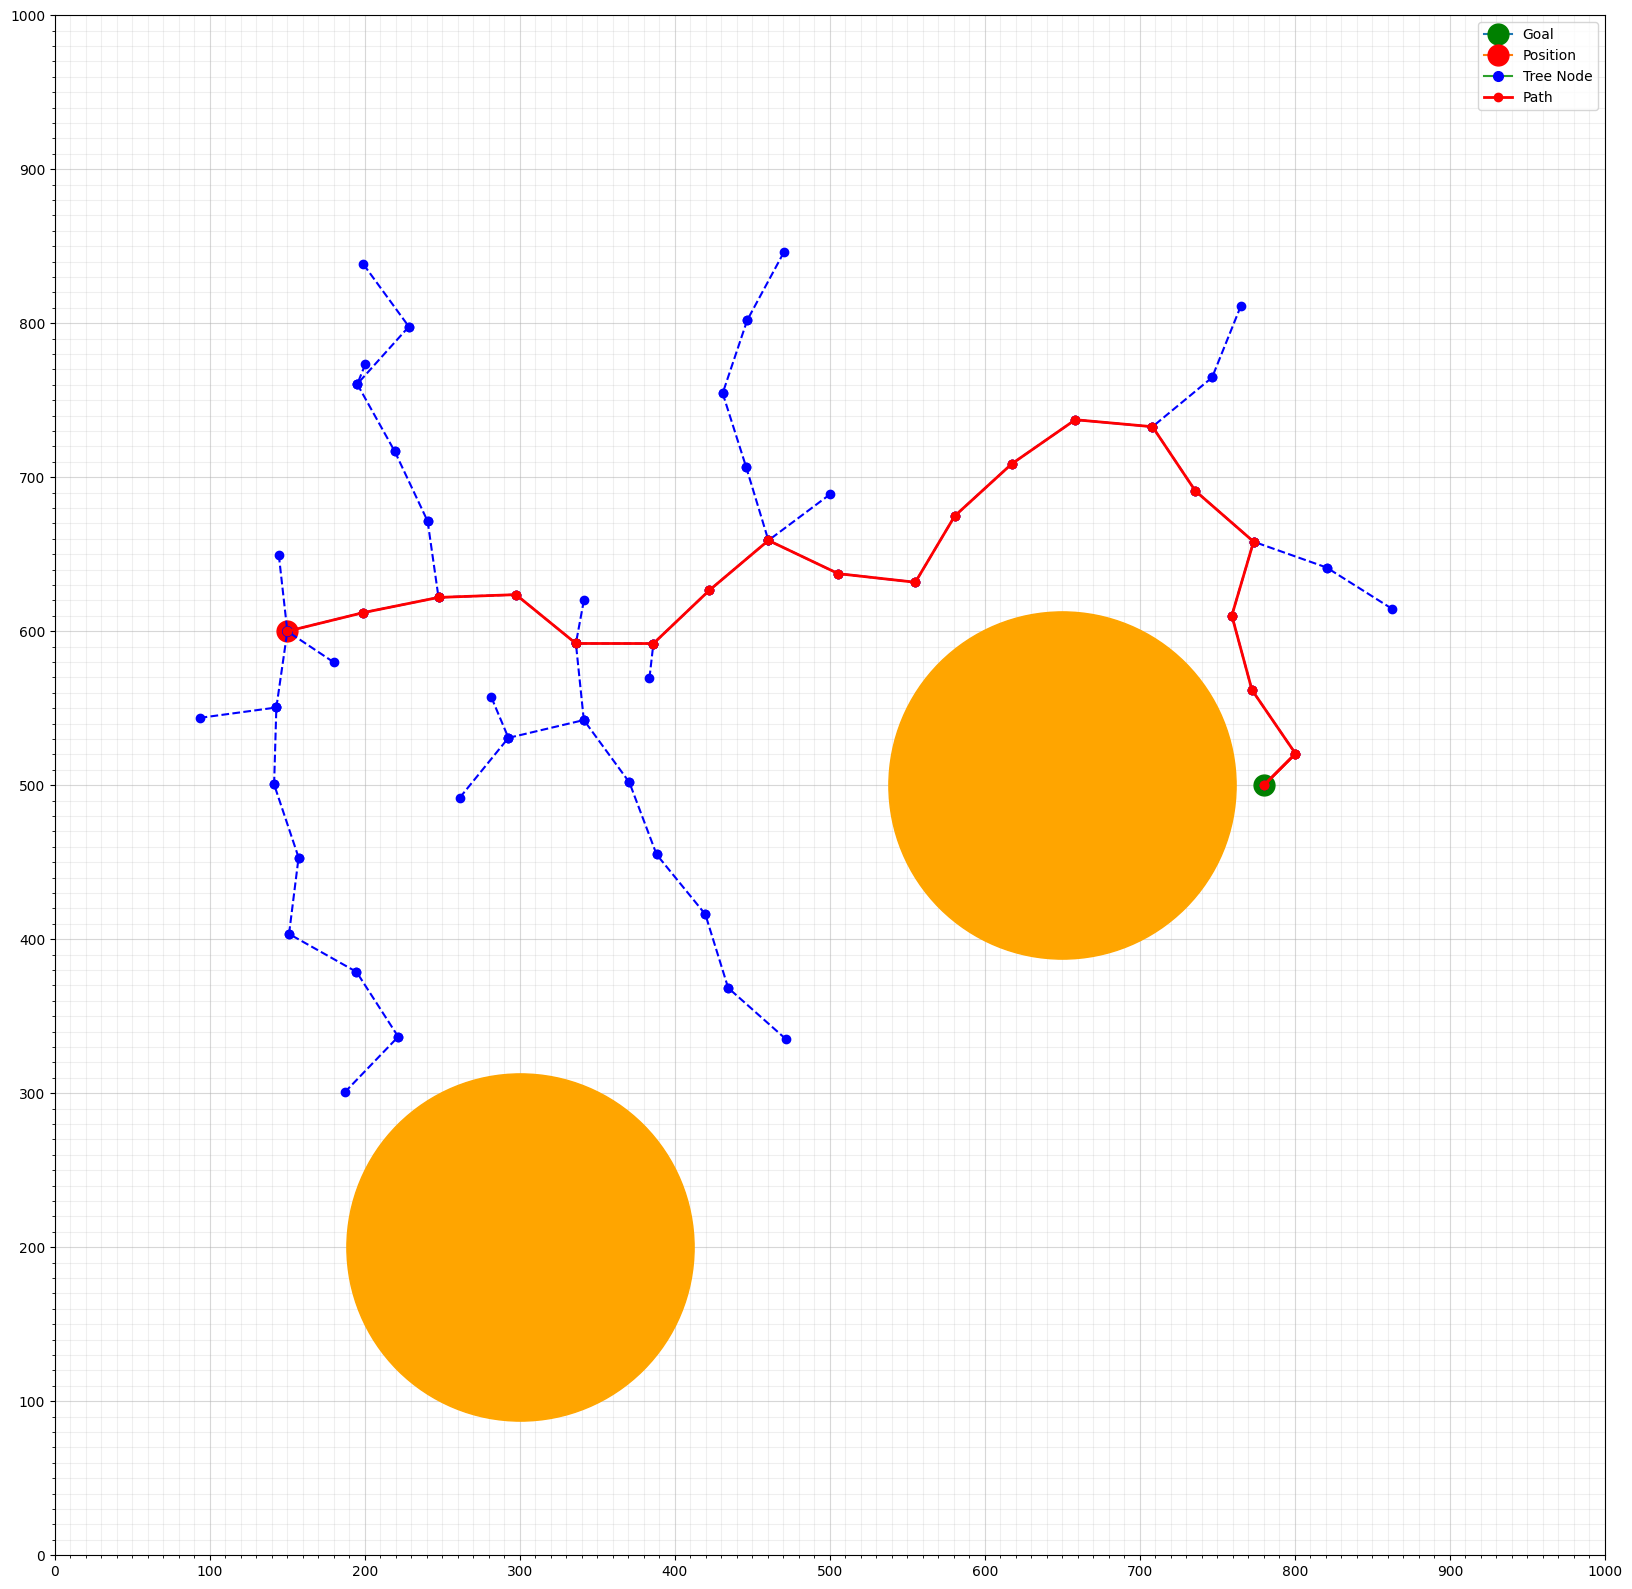

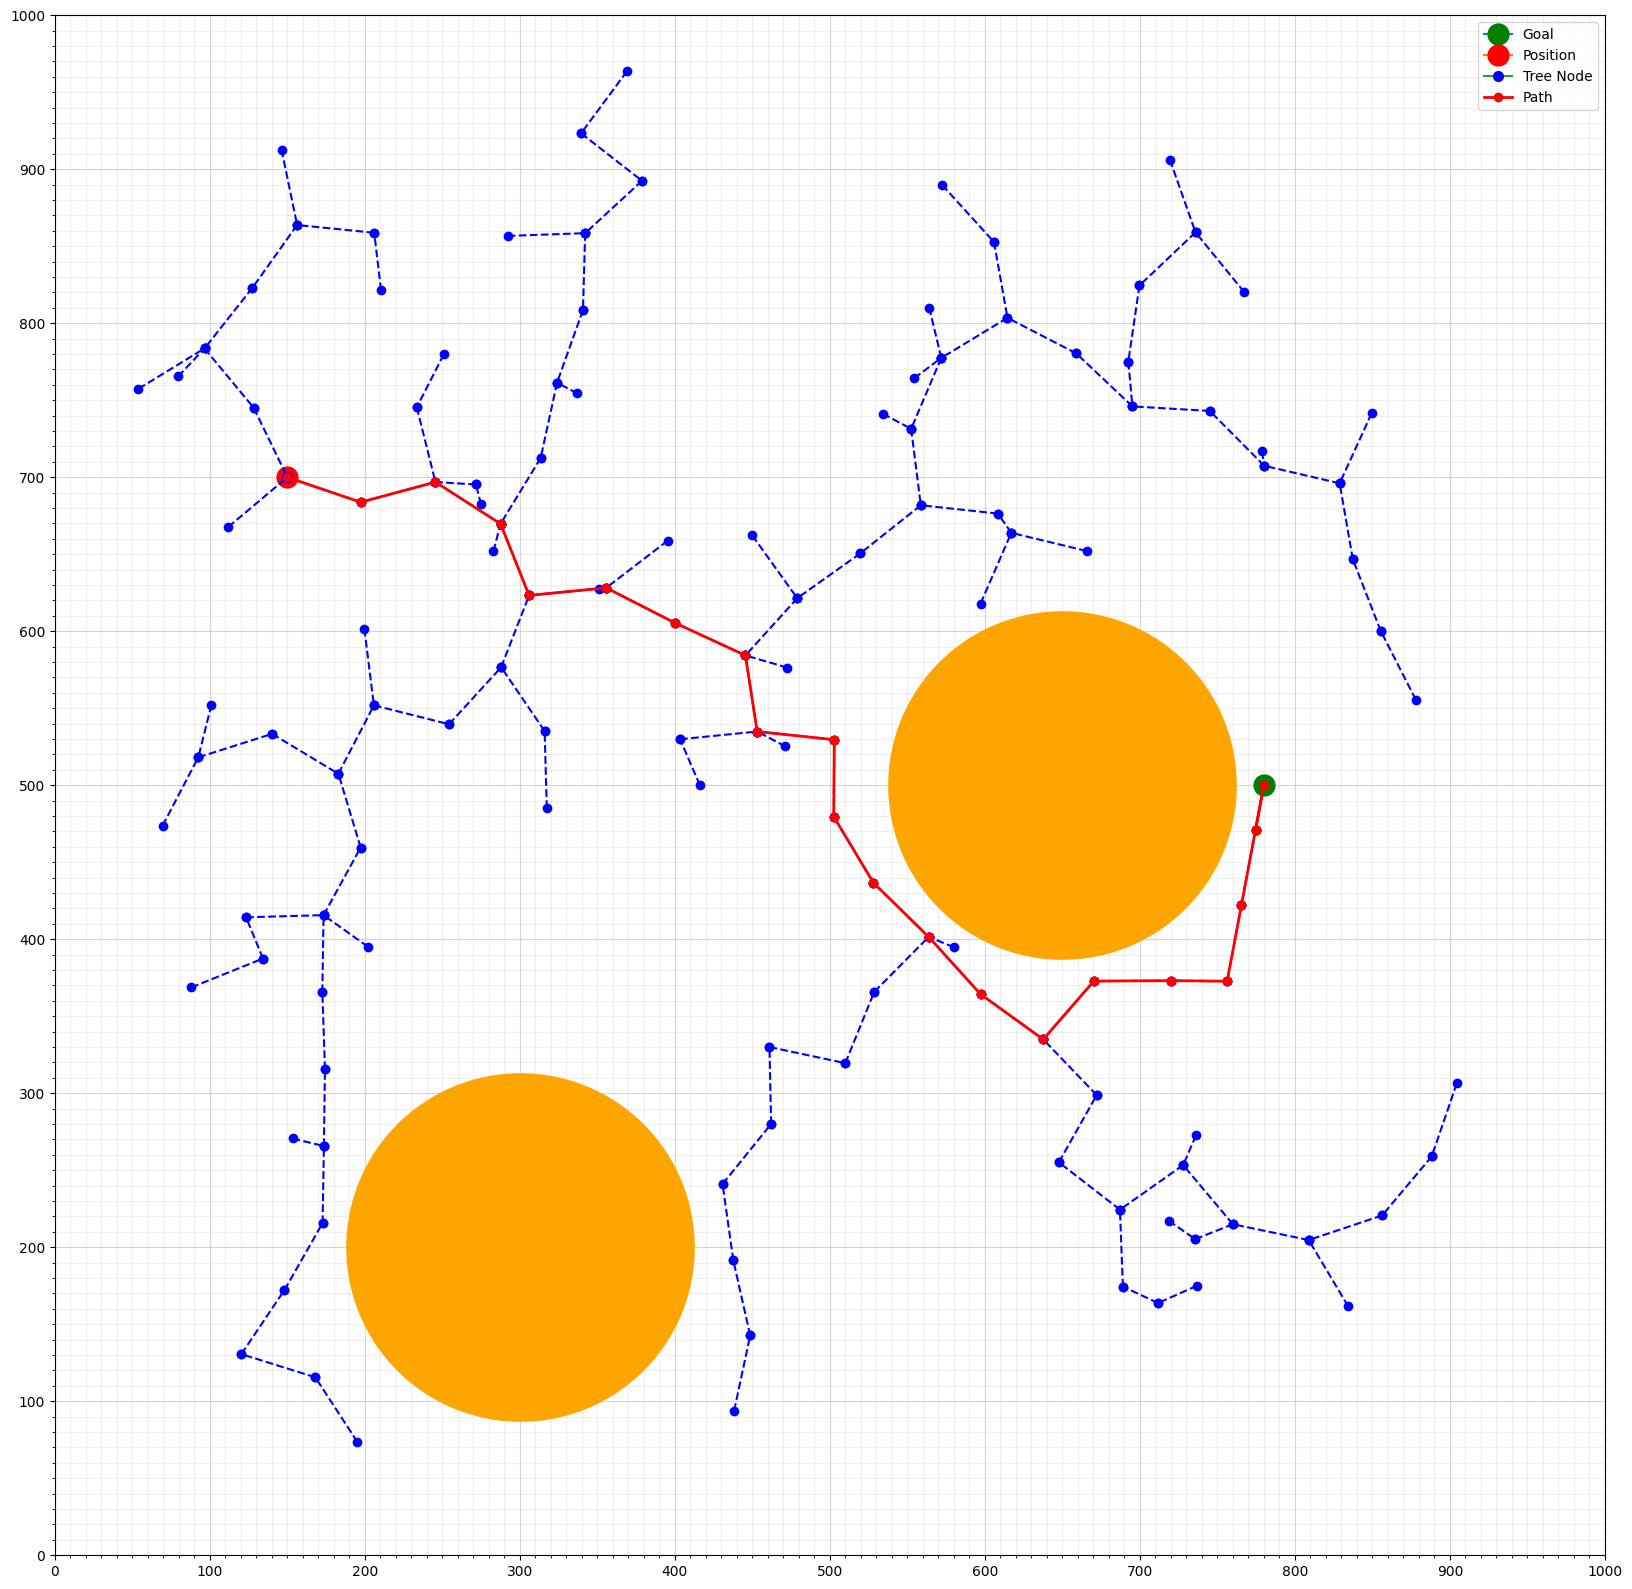

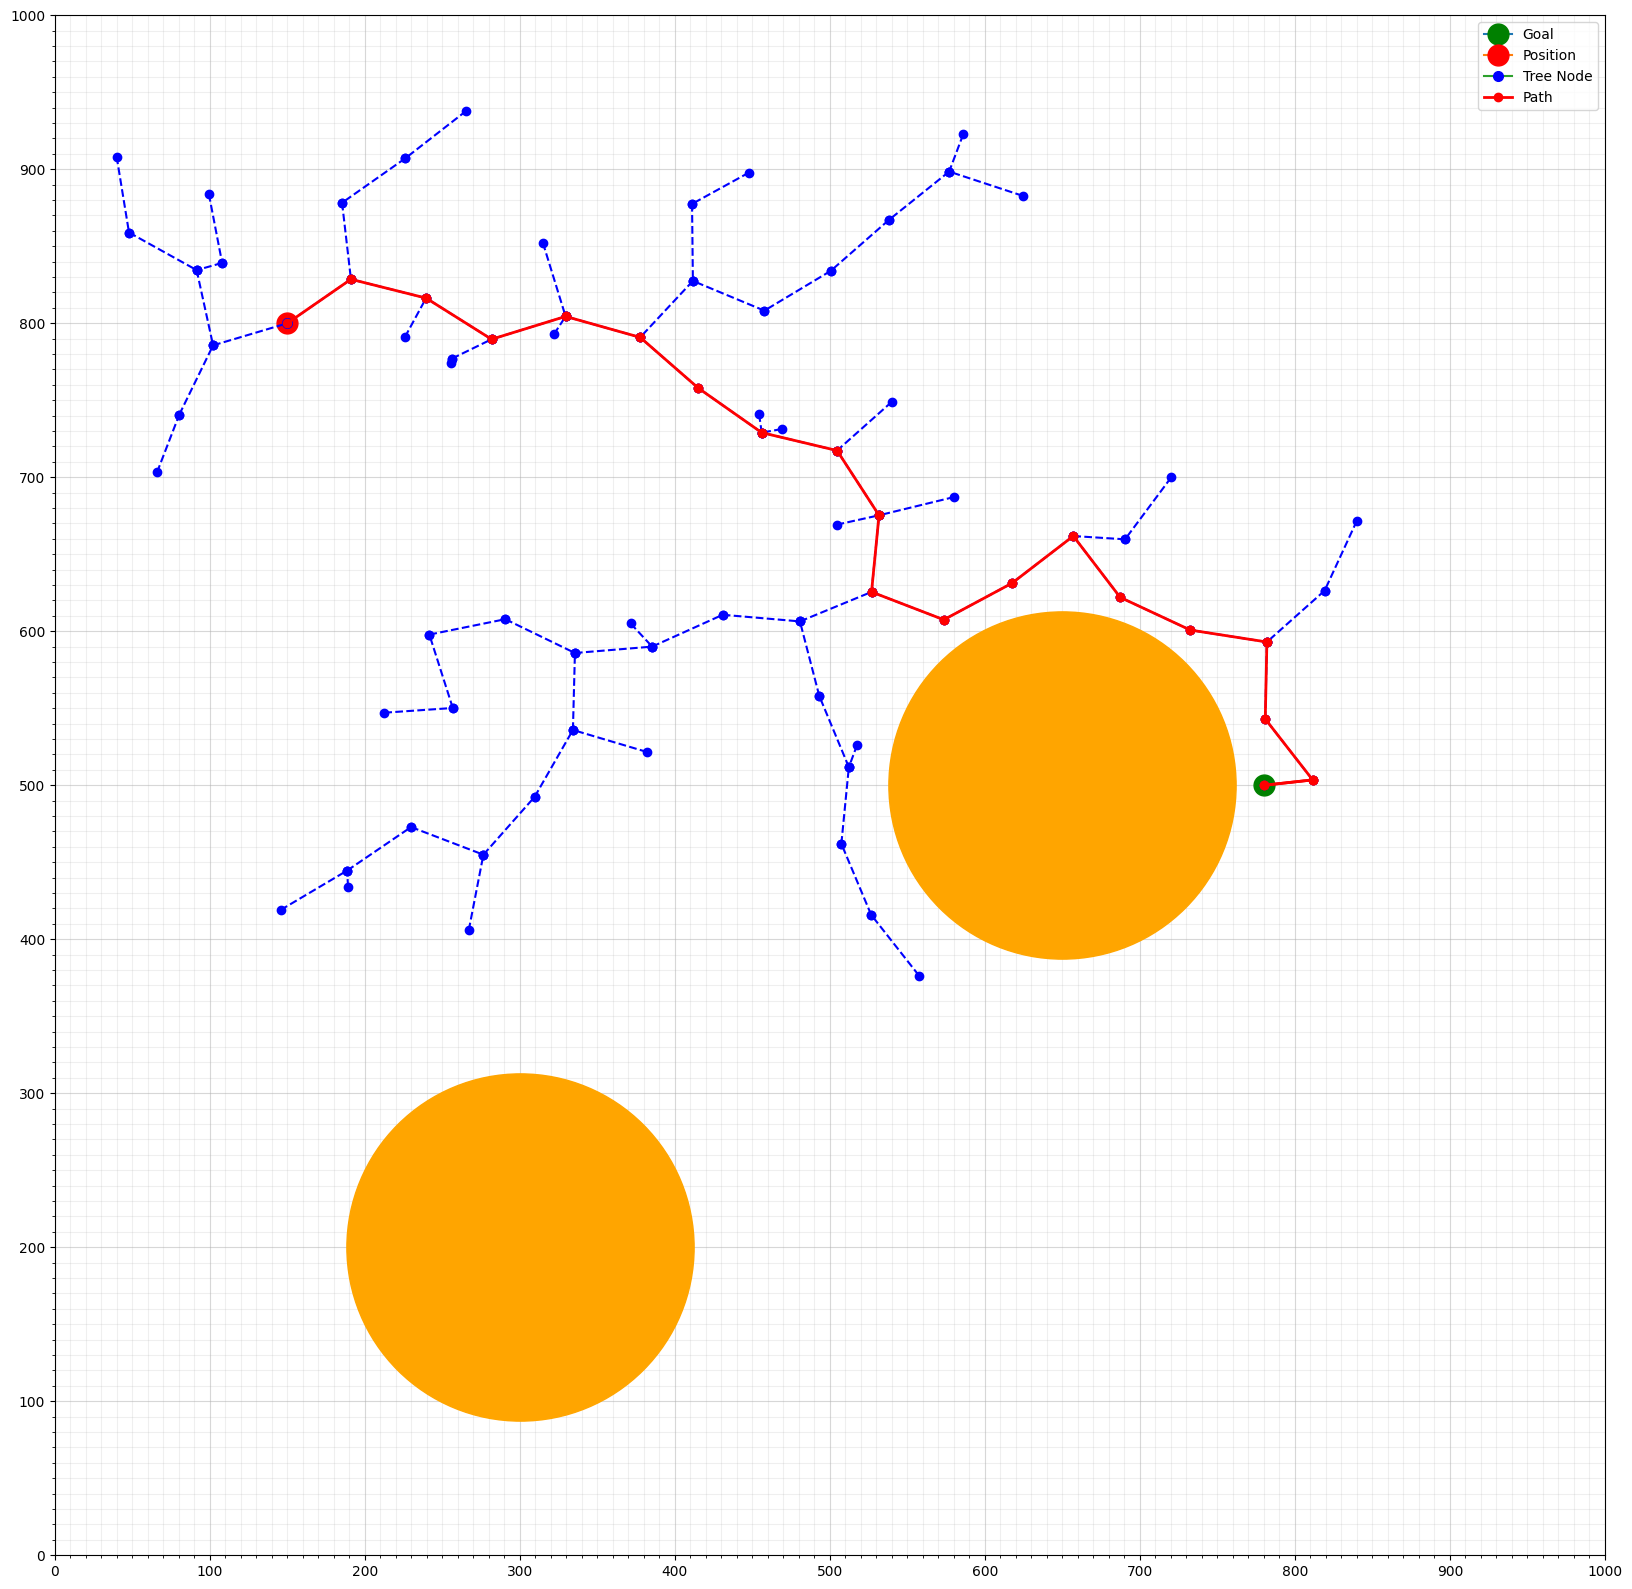

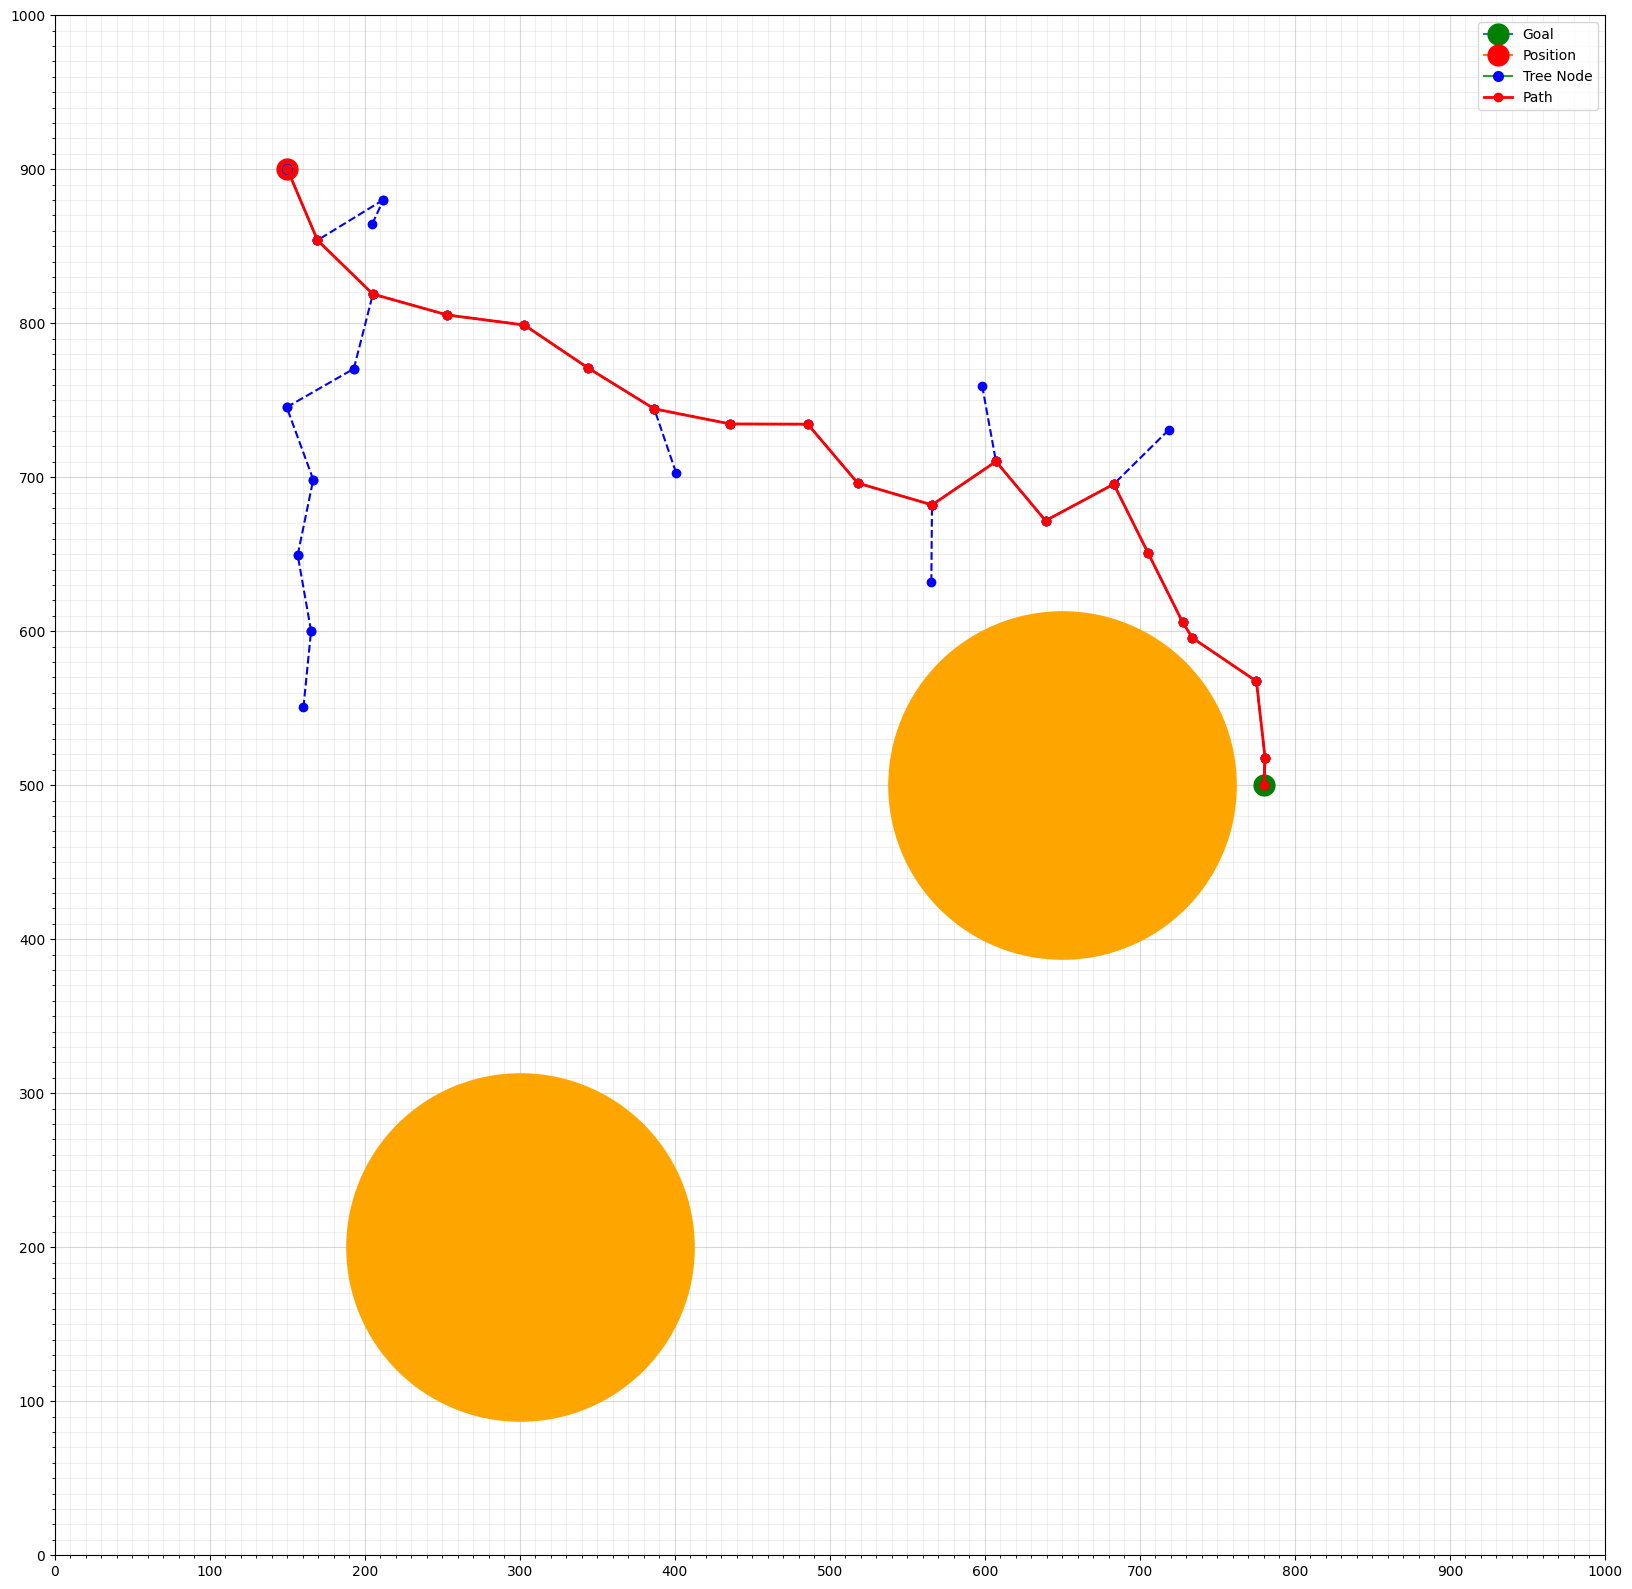

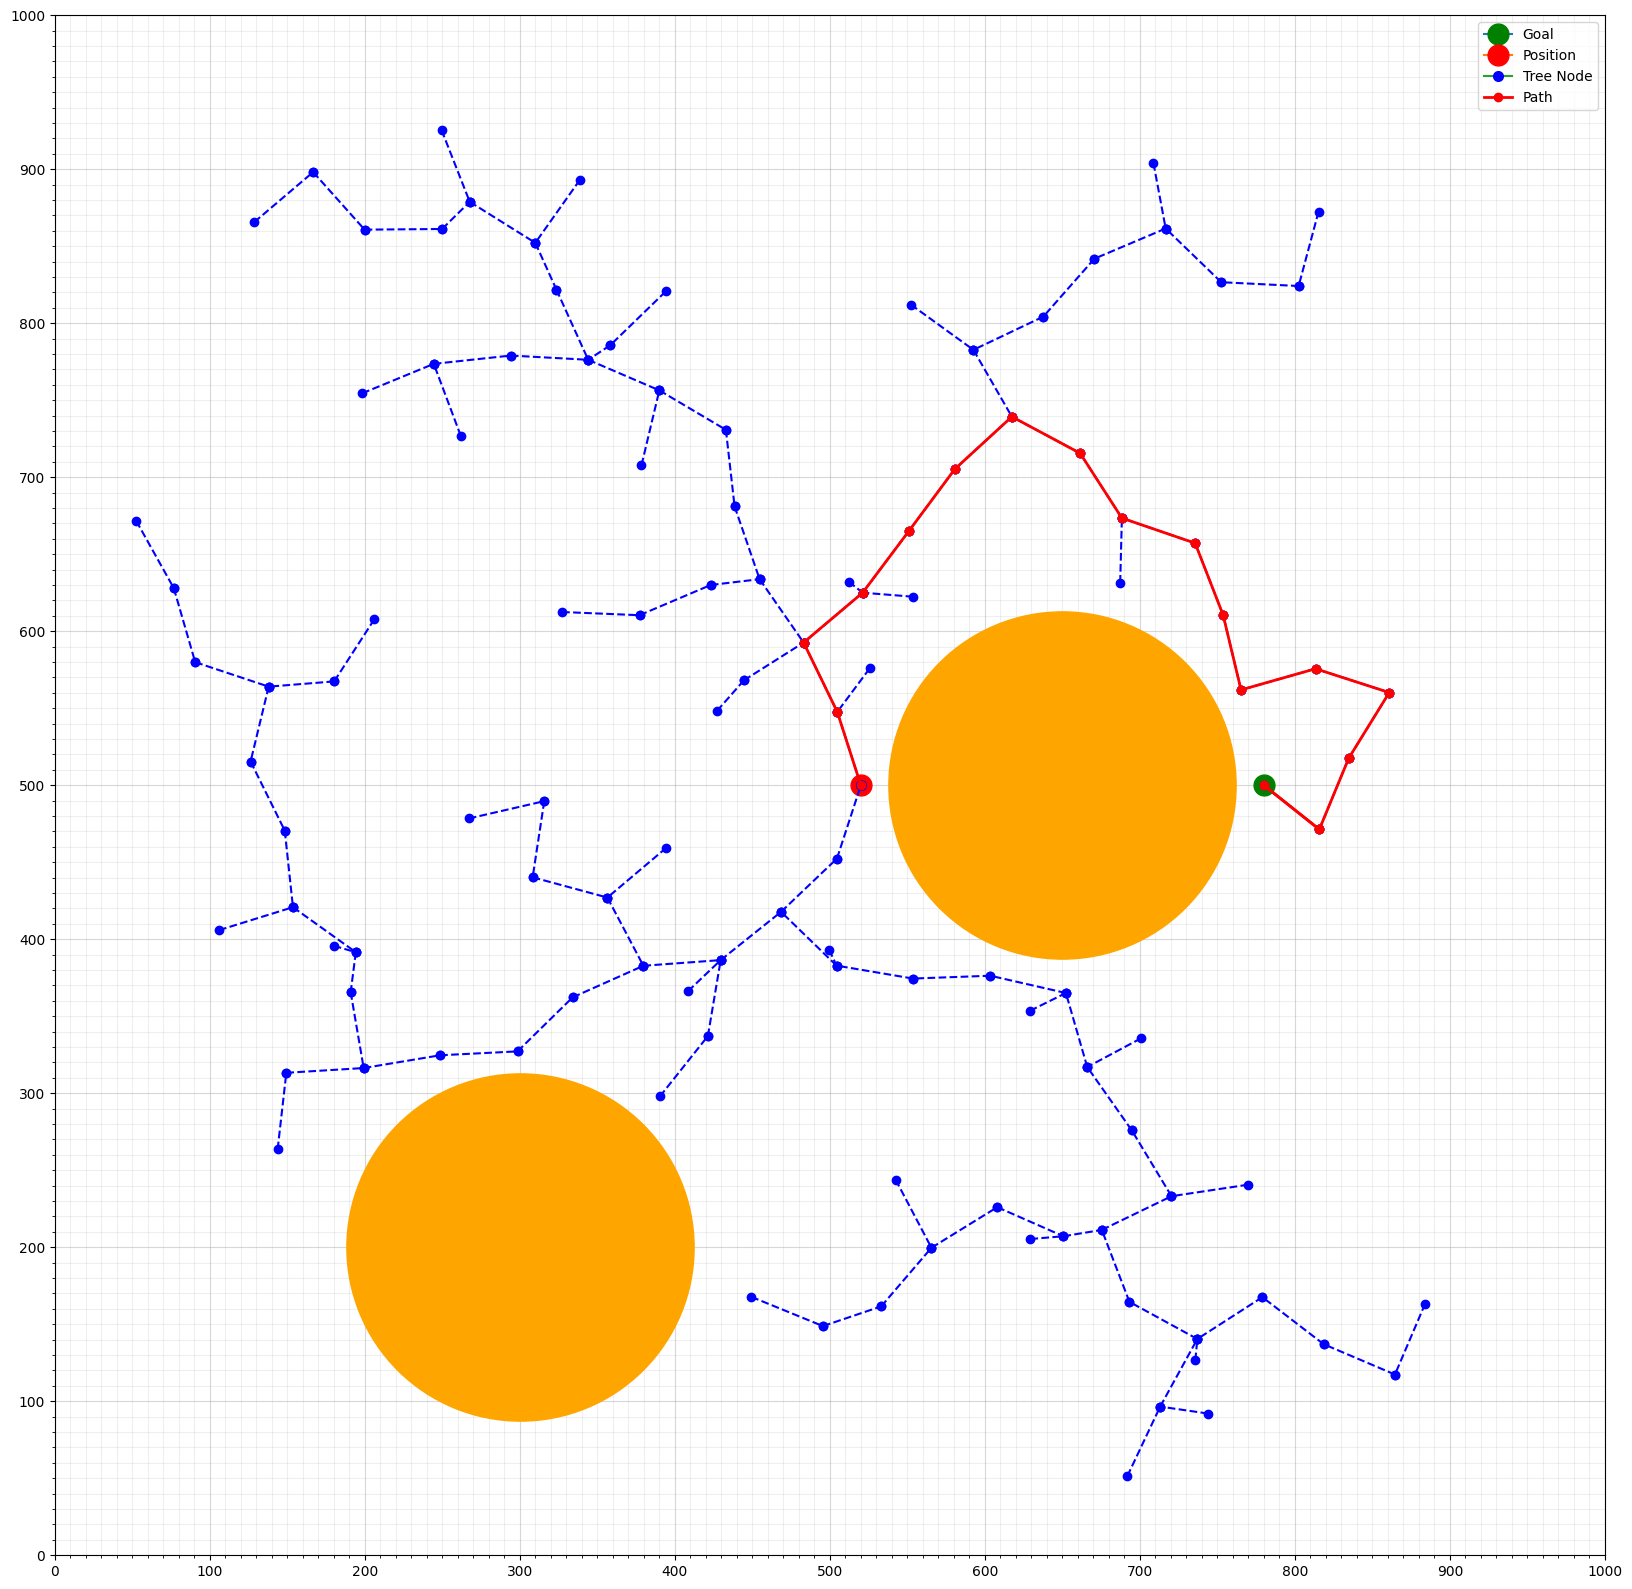

In [499]:
###### Assignment position values ######
Position = [[150.0,100.0],[150.0,200.0],[150.0,300.0],[150.0,400.0],[150.0,500.0],[150.0,600.0],[150.0,700.0],
           [150.0,800.0],[150.0,900.0],[520.0,500.0]]
for i in range(0, len(Position)):
    main(Position[i])